In [1]:
import pandas as pd


* Algumas constantes

In [2]:
area_cerrado_maranhense = 217029
area_cerrado_maranhense

217029

In [3]:
area_estado_ma = 329651
area_estado_ma

329651

In [4]:
area_cerrado_maranhense/ area_estado_ma

0.6583599018355776

## Carregando os dados

In [5]:
df = pd.read_csv('dados/csv/terrabrasilis_cerrado_5_18_2024,_11_26_39 AM.csv')
df.head()

,year,areakm,municipality,geocode_ibge,state
0,2000,42.515084,Afonso Cunha,2100105,Maranhão
1,2001,1.687509,Afonso Cunha,2100105,Maranhão
2,2002,1.687509,Afonso Cunha,2100105,Maranhão
3,2003,3.922876,Afonso Cunha,2100105,Maranhão
4,2004,3.922876,Afonso Cunha,2100105,Maranhão


* Para quais anos temos dados ?

In [4]:
df["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

## Algumas perguntas inicias, sobre o desmatamento absoluto e relativo

* Qual o total de desmatamento no bioma ?

In [7]:
total_desmatamento = df["areakm"].sum()
print( total_desmatamento, total_desmatamento / area_cerrado_maranhense)

89880.3660872508 0.4141398895412632


* Qual o total de desmatamento no bioma, na mascara de 2000 ?

In [8]:
total_desmatamento_00 = df[df["year"] == 2000]["areakm"].sum()
print( total_desmatamento_00, total_desmatamento_00 / area_cerrado_maranhense)

41356.95237303544 0.19055956749114378


* Qual o total de desmatamento no bioma, de 2001 a 2023 ?

In [9]:
total_desmatamento_01_23 = df[df["year"] != 2000]["areakm"].sum()
print( total_desmatamento_01_23, total_desmatamento_01_23 / area_cerrado_maranhense)

48523.41371421536 0.2235803220501194


## Visualizando a evolução do desmatamento no bioma

In [17]:
df_por_ano = df.groupby("year")["areakm"].sum().reset_index().set_index("year")
df_por_ano

,areakm
year,
2000,41356.952373
2001,2338.595392
2002,2338.595392
2003,2908.182797
2004,2908.182797
2005,2431.024448
2006,2431.024448
2007,2961.520519
2008,2961.520519


In [18]:
df_por_ano["Percentual do Bioma"] = df_por_ano["areakm"] / area_cerrado_maranhense
df_por_ano

,areakm,Percentual do Bioma
year,,
2000,41356.952373,0.190560
2001,2338.595392,0.010775
2002,2338.595392,0.010775
2003,2908.182797,0.013400
2004,2908.182797,0.013400
2005,2431.024448,0.011201
2006,2431.024448,0.011201
2007,2961.520519,0.013646
2008,2961.520519,0.013646


* variação, ou aceleração

In [38]:
aceleracao_desmatamento = df_por_ano.pct_change().drop([2000, 2001]) * 100
aceleracao_desmatamento.head()

,areakm,Percentual do Bioma
year,,
2002,0.000000,0.000000
2003,24.355962,24.355962
2004,0.000000,0.000000
2005,-16.407440,-16.407440
2006,0.000000,0.000000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


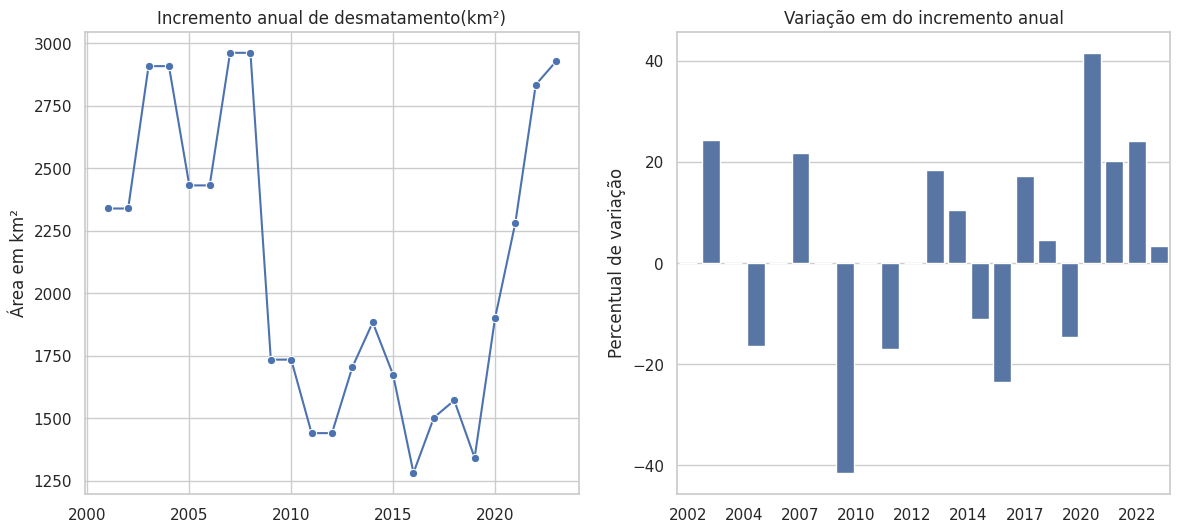

In [49]:
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.lineplot(ax=axs[0], x='year', y='areakm', data=df_por_ano.drop(2000), marker='o', legend=False)

axs[0].set_title('Incremento anual de desmatamento(km²)')
axs[0].set_xlabel('')
axs[0].set_ylabel('Área em km²')


sns.barplot(ax=axs[1], x='year', y='areakm', data=aceleracao_desmatamento, )
axs[1].xaxis.set_major_locator(plt.AutoLocator())

axs[1].set(title='Variação em do incremento anual', xlabel='', ylabel='Percentual de variação')


plt.show()


## Visualizando por municipio

* agrupar por municipio

In [23]:
df_por_mun = df.groupby(["geocode_ibge","municipality","year"])["areakm"].first().unstack().reset_index().set_index("geocode_ibge")
df_por_mun.index.name = "geocode"
df_por_mun.head()

year,municipality,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
geocode,,,,,,,,,,,,,,,,,,,,,
2100105,Afonso Cunha,42.515084,1.687509,1.687509,3.922876,3.922876,1.355789,1.355789,3.786717,3.786717,...,0.984561,8.254625,5.729277,18.178811,6.627577,8.303116,7.185932,3.296597,2.747247,4.186628
2100154,Água Doce do Maranhão,64.003850,8.968045,8.968045,18.288683,18.288683,10.526301,10.526301,10.479238,10.479238,...,5.720458,4.226481,6.334058,4.823428,8.401773,4.966519,4.668220,3.145991,3.628249,2.505242
2100303,Aldeias Altas,93.311739,14.068892,14.068892,24.528664,24.528664,25.203367,25.203367,43.636436,43.636436,...,8.372906,9.312877,3.497253,6.984161,8.742854,12.293774,11.907539,85.203531,99.131740,54.036724
2100436,Alto Alegre do Maranhão,278.668521,4.362173,4.362173,8.383284,8.383284,3.197358,3.197358,4.355761,4.355761,...,1.662265,3.000325,0.162847,1.073610,1.061967,1.564407,0.905481,0.374098,1.686070,1.541568
2100501,Alto Parnaíba,509.572054,32.030547,32.030547,63.398056,63.398056,18.698535,18.698535,88.091243,88.091243,...,13.133912,33.036303,59.569205,81.909833,17.098499,30.587533,38.870550,55.979650,141.030410,255.546576


In [10]:
import geopandas as gpd

* Carregando os dados espaciais

In [29]:
gdf_mun = gpd.read_file("dados/limites/MA_Municipios_2022.zip")
gdf_mun.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2100055,Açailândia,MA,5805.159,"POLYGON ((-47.40208 -5.03469, -47.47673 -5.046..."
1,2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223..."
2,2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844..."
3,2100204,Alcântara,MA,1167.964,"MULTIPOLYGON (((-44.57175 -2.21957, -44.56274 ..."
4,2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644..."


* para integrar os dados, vamos precisar que os tipos das colunas sejam iguais

In [30]:
gdf_mun["CD_MUN"]

0      2100055
1      2100105
2      2100154
3      2100204
4      2100303
        ...   
212    2112803
213    2112852
214    2112902
215    2113009
216    2114007
Name: CD_MUN, Length: 217, dtype: object

In [31]:
df_por_mun.index

Index([2100105, 2100154, 2100303, 2100436, 2100501, 2100600, 2100709, 2100808,
       2100907, 2100956,
       ...
       2111904, 2111953, 2112001, 2112100, 2112209, 2112233, 2112308, 2112506,
       2112605, 2112704],
      dtype='int64', name='geocode', length=139)

In [32]:
gdf_mun["CD_MUN"] = gdf_mun["CD_MUN"].astype('int64')
gdf_mun.set_index("CD_MUN", inplace=True)
gdf_mun.head()


,NM_MUN,SIGLA_UF,AREA_KM2,geometry
CD_MUN,,,,
2100055,Açailândia,MA,5805.159,"POLYGON ((-47.40208 -5.03469, -47.47673 -5.046..."
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223..."
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844..."
2100204,Alcântara,MA,1167.964,"MULTIPOLYGON (((-44.57175 -2.21957, -44.56274 ..."
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644..."


<Axes: >

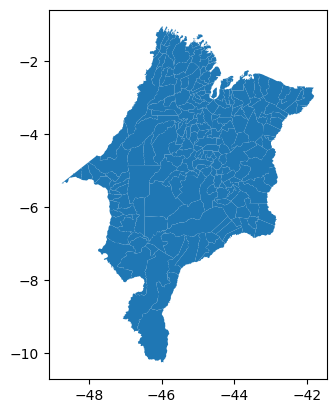

In [39]:
gdf_mun.plot()

* selecionar apenas os que temos dados, dentro do cerrado

In [37]:
gdf_mun_cerrado = gdf_mun.loc[df_por_mun.index]

<Axes: >

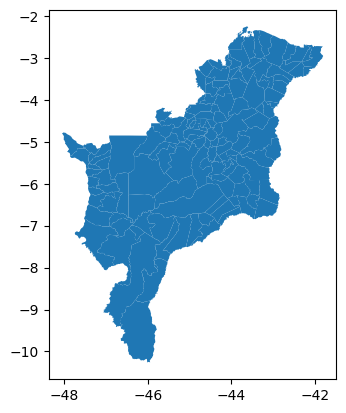

In [38]:
gdf_mun_cerrado.plot()

* incluir no dado geografico o desmatamento em km2 de 2000 e o percentual

In [42]:
gdf_mun_cerrado["D2000_km2"] = df_por_mun[2000]
gdf_mun_cerrado["D2000_Perc"] = df_por_mun[2000] / gdf_mun_cerrado["AREA_KM2"]
gdf_mun_cerrado.head(3)

,NM_MUN,SIGLA_UF,AREA_KM2,geometry,D2000_km2,D2000_Perc
geocode,,,,,,
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223...",42.515084,0.114492
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844...",64.003850,0.144709
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644...",93.311739,0.048046


* desmatamento de 2001 a 2023

In [60]:
gdf_mun_cerrado["D2001-23_km2"] = df_por_mun[range(2001,2024)].sum(axis=1)
gdf_mun_cerrado["D2001-23_perc"] = gdf_mun_cerrado["D2001-23_km2"] / gdf_mun_cerrado["AREA_KM2"]
gdf_mun_cerrado.head(3)

,NM_MUN,SIGLA_UF,AREA_KM2,geometry,D2000_km2,D2000_Perc,D2001-23_km2,D2001-23_perc
geocode,,,,,,,,
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223...",42.515084,0.114492,93.137045,0.250815
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844...",64.003850,0.144709,168.707853,0.381440
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644...",93.311739,0.048046,580.655785,0.298980


In [63]:
gdf_mun_cerrado["D2000-23_perc"] = gdf_mun_cerrado["D2001-23_perc"] + gdf_mun_cerrado["D2000_Perc"]
gdf_mun_cerrado.head(3)

,NM_MUN,SIGLA_UF,AREA_KM2,geometry,D2000_km2,D2000_Perc,D2001-23_km2,D2001-23_perc,D2000-23_perc
geocode,,,,,,,,,
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223...",42.515084,0.114492,93.137045,0.250815,0.365306
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844...",64.003850,0.144709,168.707853,0.381440,0.526149
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644...",93.311739,0.048046,580.655785,0.298980,0.347027


In [66]:
gdf_mun_cerrado.sort_values("D2001-23_perc", ascending=False).head(20)


,NM_MUN,SIGLA_UF,AREA_KM2,geometry,D2000_km2,D2000_Perc,D2001-23_km2,D2001-23_perc,D2000-23_perc
geocode,,,,,,,,,
2104602,Governador Eugênio Barros,MA,647.989,"POLYGON ((-43.86224 -5.43659, -43.86237 -5.437...",169.182290,0.261088,406.892402,0.627931,0.889019
2104628,Governador Luiz Rocha,MA,401.587,"POLYGON ((-44.07316 -5.44814, -44.07353 -5.446...",64.513392,0.160646,225.063041,0.560434,0.721080
2111748,Senador Alexandre Costa,MA,426.437,"POLYGON ((-44.10290 -5.32344, -44.12291 -5.256...",76.968914,0.180493,226.589385,0.531355,0.711848
2110708,São Domingos do Maranhão,MA,1151.978,"POLYGON ((-44.20487 -5.71780, -44.21739 -5.728...",474.384041,0.411800,503.482407,0.437059,0.848859
2100808,Anapurus,MA,608.903,"POLYGON ((-43.10270 -3.52986, -43.10281 -3.529...",29.749528,0.048858,265.160635,0.435473,0.484330
2104701,Graça Aranha,MA,271.445,"POLYGON ((-44.33229 -5.46181, -44.33265 -5.461...",111.839308,0.412015,117.364401,0.432369,0.844384
2111078,São João do Soter,MA,1438.067,"POLYGON ((-43.64820 -5.12432, -43.65020 -5.127...",105.909203,0.073647,620.645773,0.431583,0.505230
2106607,Matões,MA,2108.671,"POLYGON ((-43.32497 -5.56683, -43.32804 -5.566...",195.472683,0.092699,899.058937,0.426363,0.519062
2109759,Santa Filomena do Maranhão,MA,623.213,"POLYGON ((-44.58278 -5.37990, -44.58261 -5.380...",149.603381,0.240052,249.268163,0.399973,0.640024
